# SRGAN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
import os
sys.path.append(os.path.abspath('/content/drive/My Drive/Colab Notebooks/super-resolution'))

In [3]:
import os
import matplotlib.pyplot as plt

from model.srgan import generator, discriminator
# from train import SrganTrainer, SrganGeneratorTrainer
import tensorflow as tf
import cv2

tf.enable_eager_execution()

%matplotlib inline

In [0]:
# Location of model weights (needed for demo)
# weights_dir = 'weights/srgan'
weights_dir = '/content/drive/My Drive/Colab Notebooks/super-resolution/weights/SRGAN/'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

# Run the project

### SRGAN: training on pretrained weights and single resolution function (SRGAN and bicubic from cv2)

In [0]:
pre_generator = generator()
gan_generator = generator()

pre_generator.load_weights(weights_file('pre_generator.h5'))
gan_generator.load_weights(weights_file('gan_generator.h5'))

In [0]:
from model import resolve_single
from utils import load_image

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    bicubic_img = cv2.resize(lr, dsize = (496, 472), 
                             interpolation = cv2.INTER_CUBIC)
    gan_sr = resolve_single(gan_generator, lr)
    
    plt.figure(figsize=(20, 20))
    
    images = [lr, bicubic_img, gan_sr]
    titles = ['LR', 'bicubic', 'SR (GAN)']
    positions = [1, 3, 4]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

def resolve_and_plot_2(lr_image_path):
    lr = load_image(lr_image_path)
    gan_sr = resolve_single(gan_generator, lr)
    print(gan_sr.shape)
    
    plt.figure(figsize=(20, 20))
    
    images = [lr, gan_sr]
    titles = ['LR', 'SR (GAN)']
    positions = [1, 2]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

def save_picture(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(gan_generator, lr)

    cv2.imwrite('/content/drive/My Drive/Colab Notebooks/super-resolution/output/picture_srgan.jpg', sr.numpy())
  

# Experiments

In [0]:
example_dir = '/content/drive/My Drive/Colab Notebooks/super-resolution/demo'

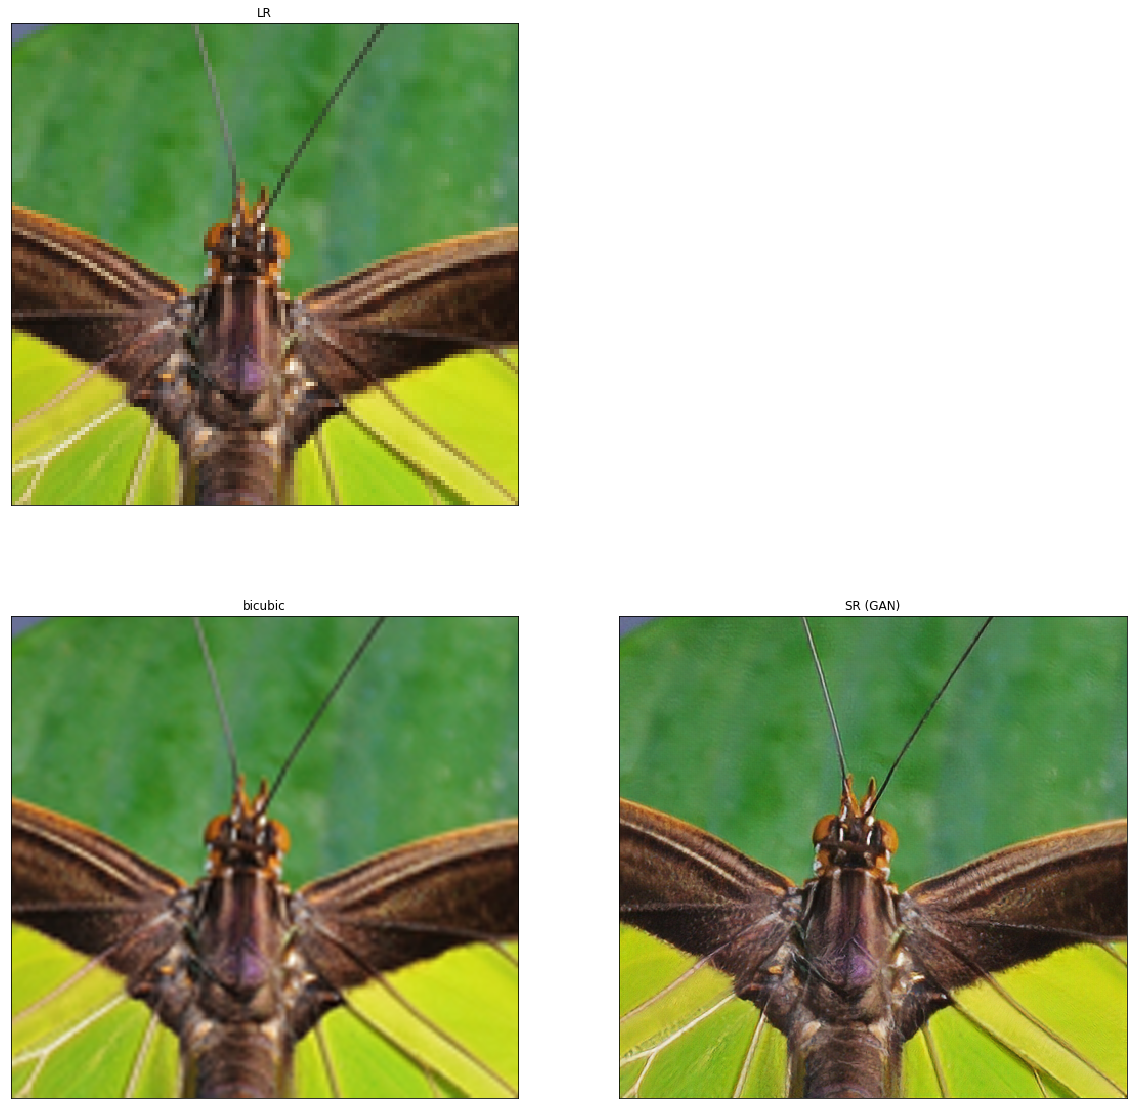

In [8]:
resolve_and_plot(os.path.join(example_dir, '0829x4-crop.png'))

In [0]:
# resolve_and_plot_2(os.path.join(example_dir, '0829x4-crop.png'))

In [0]:
# bicubic_resolve(os.path.join(example_dir, '0829x4-crop.png'))

(744, 1092, 3)


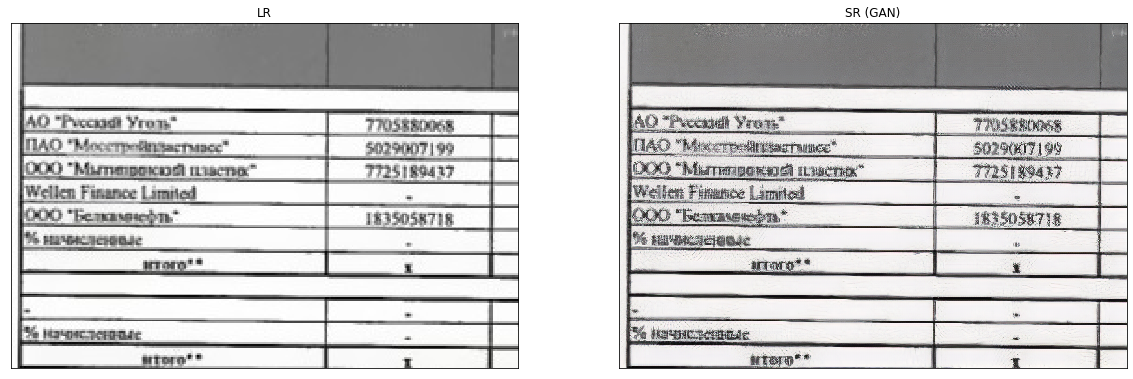

In [11]:
resolve_and_plot_2(os.path.join(example_dir, 'rt.jpg'))
save_picture(os.path.join(example_dir, 'rt.jpg'))

(764, 1056, 3)


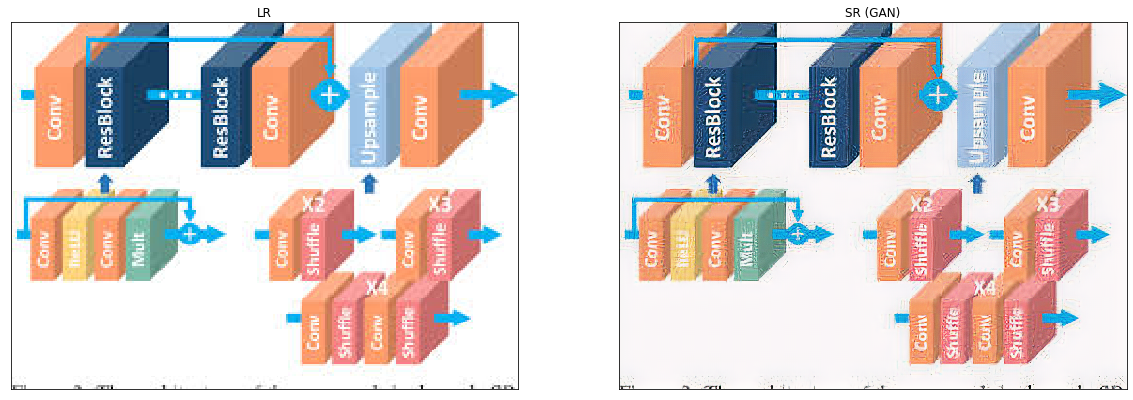

In [12]:
resolve_and_plot_2(os.path.join(example_dir, 'EDSR.jpeg'))